In [18]:
import cantera as ct
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(f"Running Cantera Version: {ct.__version__}")

Running Cantera Version: 3.0.0


In [11]:
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["legend.fontsize"] = 10
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["figure.dpi"] = 120

# Get the best of both ggplot and seaborn

#from matplotlib import pyplot as plt
#plt.style.use('ggplot')
#plt.style.use('seaborn')

plt.rcParams["figure.autolayout"] = True

In [12]:
# Inlet Temperature in Kelvin and Inlet Pressure in Pascals
# In this case we are setting the inlet T and P to room temperature conditions
To = 300
Po = 101325

# Define the gas-mixutre and kinetics
# In this case, we are choosing a GRI3.0 gas
gas = ct.Solution("Jerzembeck.yaml")

# Create a stoichiometric C8H18/Air premixed mixture
gas.set_equivalence_ratio(0.75, "IXC8H18", {"O2": 1.0, "N2": 3.76})
gas.TP = To, Po

In [13]:
width = 0.014

# Create the flame object
flame = ct.FreeFlame(gas, width=width)

# Define tolerances for the solver
flame.set_refine_criteria(ratio=3, slope=0.1, curve=0.1)

# Define logging level
loglevel = 1

In [14]:
flame.solve(loglevel=loglevel, auto=True)
Su0 = flame.velocity[0]
print(f"Flame Speed is: {Su0 * 100:.2f} cm/s")



************ Solving on 8 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     2.136e-05       5.37
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0003649      4.693
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.002771      3.837
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.03156      2.542
Attempt Newton solution of steady-state problem...    success.

Problem solved on [9] point grid(s).
Expanding domain to accommodate flame thickness. New width: 0.028 m
##############################################################################
Refining grid in flame.
    New points inserted after grid points 0 1 2 3 4 5 6 7 
    to resolve AXC5H10 C2H C2H2 C2H3 C2H3CHO C2H3CO C2H4 C2H5 C2H5O2 C2H6 C3H2 C3

Text(0, 0.5, 'Temperature (K)')

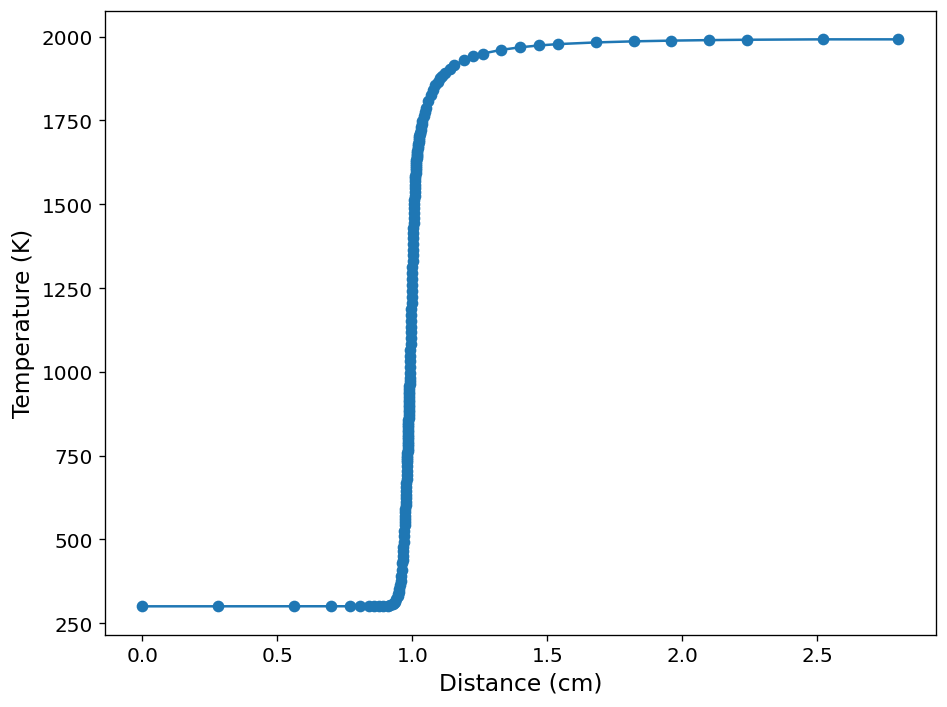

In [19]:
plt.plot(flame.grid * 100, flame.T, "-o")
plt.xlabel("Distance (cm)")
plt.ylabel("Temperature (K)")


In [20]:
specie= {'IXC8H18','O2','N2'}
for i, specie in enumerate(gas.species()):
    print(f"{i}. {specie}")

0. <Species N2>
1. <Species AR>
2. <Species O>
3. <Species O2>
4. <Species H2>
5. <Species H>
6. <Species OH>
7. <Species H2O2>
8. <Species H2O>
9. <Species HO2>
10. <Species HCO>
11. <Species CH2>
12. <Species CO>
13. <Species CH2O>
14. <Species CO2>
15. <Species CH3>
16. <Species CH4>
17. <Species C2H4>
18. <Species CH3OH>
19. <Species C2H5>
20. <Species C2H6>
21. <Species CH3O>
22. <Species HOCHO>
23. <Species CH3O2>
24. <Species CH3O2H>
25. <Species C2H2>
26. <Species CH2CO>
27. <Species C3H4XA>
28. <Species C3H4XP>
29. <Species C3H5XA>
30. <Species C2H3>
31. <Species CH3CHO>
32. <Species C2H5O2>
33. <Species C3H3>
34. <Species C3H6>
35. <Species C2H3CHO>
36. <Species CH3COCH2>
37. <Species NXC3H7>
38. <Species C3H8>
39. <Species CH3COCH3>
40. <Species IXC3H7O2>
41. <Species NXC3H7O2>
42. <Species C4H6>
43. <Species C4H8X1>
44. <Species IXC4H7>
45. <Species IXC4H8>
46. <Species IXC3H5CHO>
47. <Species IXC3H6CO>
48. <Species IXC4H10>
49. <Species C4H10>
50. <Species IXC3H5CO>
51. <S

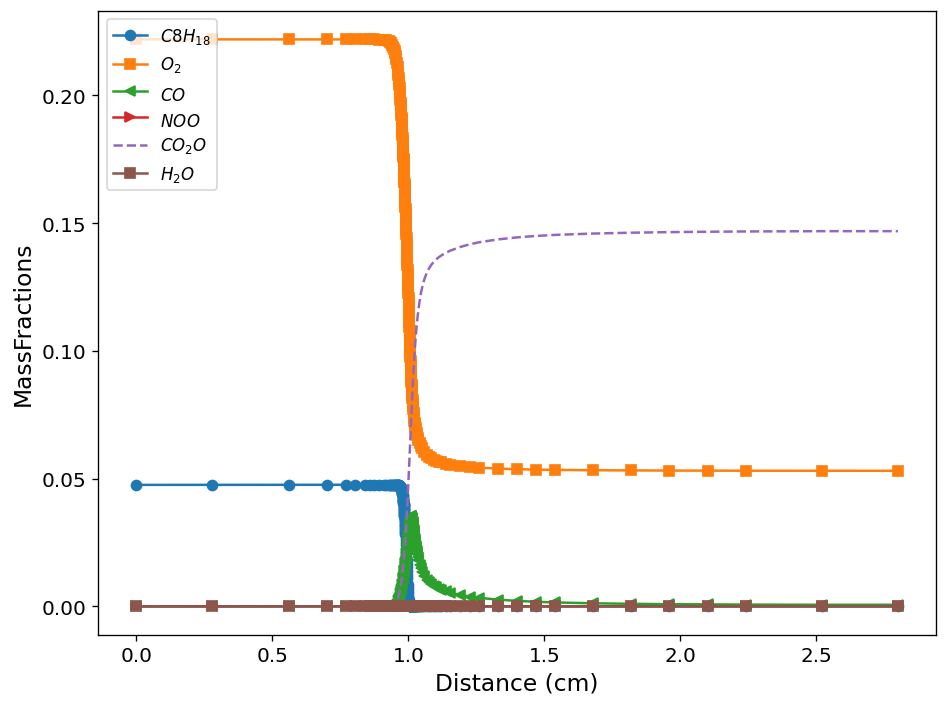

In [28]:
Y_C8H18 = flame.Y[63]
Y_O2= flame.Y[3]
Y_CO= flame.Y[12]
Y_NO= flame.Y[104]
Y_CO2 = flame.Y[14]
Y_H2O = flame.Y[5]

plt.figure()

plt.plot(flame.grid * 100, Y_C8H18, "-o", label="$C8H_{18}$")
plt.plot(flame.grid * 100, Y_O2, "-s", label="$O_{2}$")
plt.plot(flame.grid * 100, Y_CO, "-<", label="$CO_{}$")
plt.plot(flame.grid * 100, Y_NO, "->", label="$NO_{}O$")
plt.plot(flame.grid * 100, Y_CO2, "--", label="$CO_{2}O$")
plt.plot(flame.grid * 100, Y_H2O, "-s", label="$H_{2}O$")

plt.legend(loc=2)
plt.xlabel("Distance (cm)")
plt.ylabel("MassFractions");




In [78]:
import pandas as pd
data =  {'Temp':flame.T,'Grid':flame.grid,'S_L':flame.velocity,'Y_IXC8H18':flame.Y[63],'Y_CO':flame.Y[12],'Y_O2':flame.Y[3],'Y_NO':flame.Y[104],'Y_CO2':flame.Y[14],'Y_H2O':flame.Y[5],
         'HRR': flame.heat_release_rate,'C_P': flame.cp,'lambda':flame.thermal_conductivity,}
df = pd.DataFrame(data)
df.to_csv('Premixed_flames.csv')

In [79]:
df1= pd.read_csv('Premixed_flames.csv')


In [80]:
df1.head()

,Unnamed: 0,Temp,Grid,S_L,Y_IXC8H18,Y_CO,Y_O2,Y_NO,Y_CO2,Y_H2O,HRR,C_P,lambda,time_scale
0,0,300.000000,0.0000,0.223087,0.047536,4.910000e-13,0.221924,9.210000e-17,2.420000e-14,-2.070000e-15,-1.506795e+02,1040.726818,0.024564,0.000000
1,1,300.000000,0.0028,0.223087,0.047536,1.560000e-11,0.221924,2.500000e-15,1.020000e-12,-1.690000e-18,-1.150550e-02,1040.727520,0.024564,0.012551
2,2,300.000018,0.0056,0.223088,0.047536,7.100000e-10,0.221924,1.900000e-14,4.360000e-11,-2.900000e-23,-4.070000e-07,1040.733931,0.024564,0.025102
3,3,300.000235,0.0070,0.223094,0.047536,9.140000e-09,0.221924,2.180000e-13,7.200000e-10,2.350000e-23,9.620000e-08,1040.756736,0.024566,0.031377
4,4,300.001652,0.0077,0.223105,0.047536,6.240000e-08,0.221923,1.480000e-12,6.260000e-09,2.730000e-22,1.200000e-05,1040.803391,0.024571,0.034513


In [81]:
timescale = df1['time_scale']


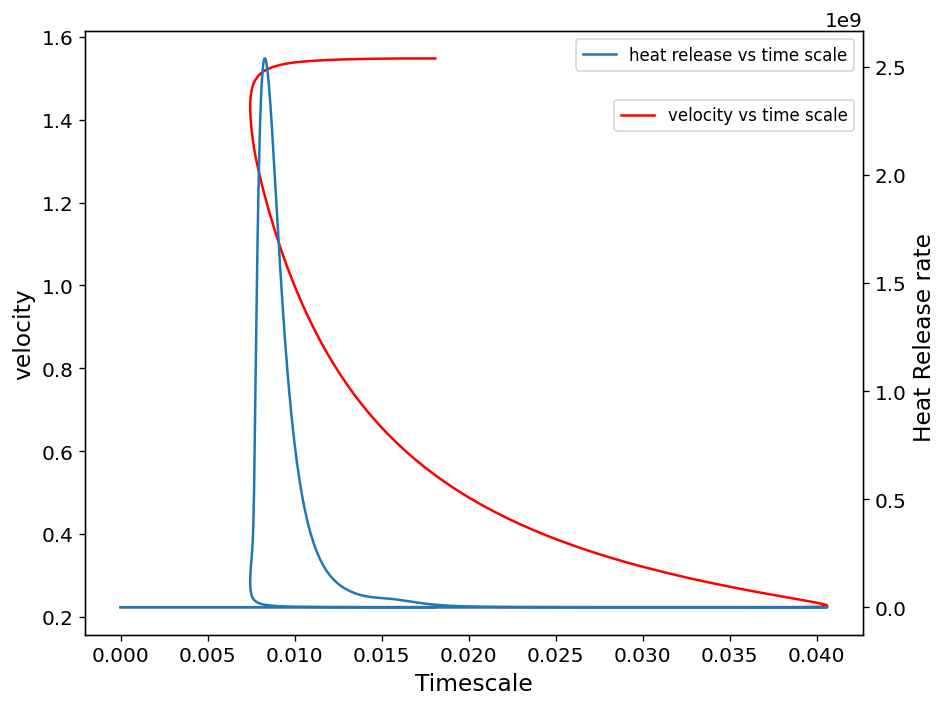

In [82]:
fig, ax1= plt.subplots()

ax1.plot(timescale,flame.velocity,label = 'velocity vs time scale',color= 'red')
ax1.set_xlabel('Timescale')
ax1.set_ylabel('velocity')
ax1.legend(bbox_to_anchor=(1,0.9))

ax2= ax1.twinx()

ax2.plot(timescale,flame.heat_release_rate,label= 'heat release vs time scale')
ax2.set_ylabel('Heat Release rate ')
ax2.legend()
fig.tight_layout()
plt.show()

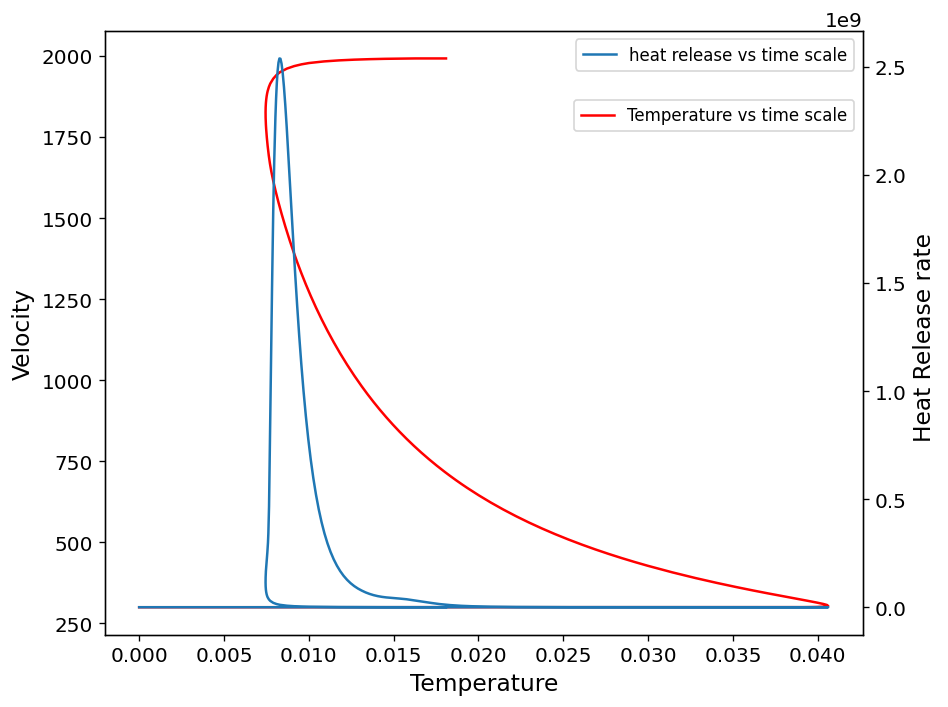

In [83]:
fig, ax1= plt.subplots()

ax1.plot(timescale,flame.T,label = 'Temperature vs time scale',color= 'red')
ax1.set_xlabel('Temperature')
ax1.set_ylabel('Velocity')
ax1.legend(bbox_to_anchor=(1,0.9))

ax2= ax1.twinx()

ax2.plot(timescale,flame.heat_release_rate,label= 'heat release vs time scale')
ax2.set_ylabel('Heat Release rate ')
ax2.legend()
fig.tight_layout()
plt.show()

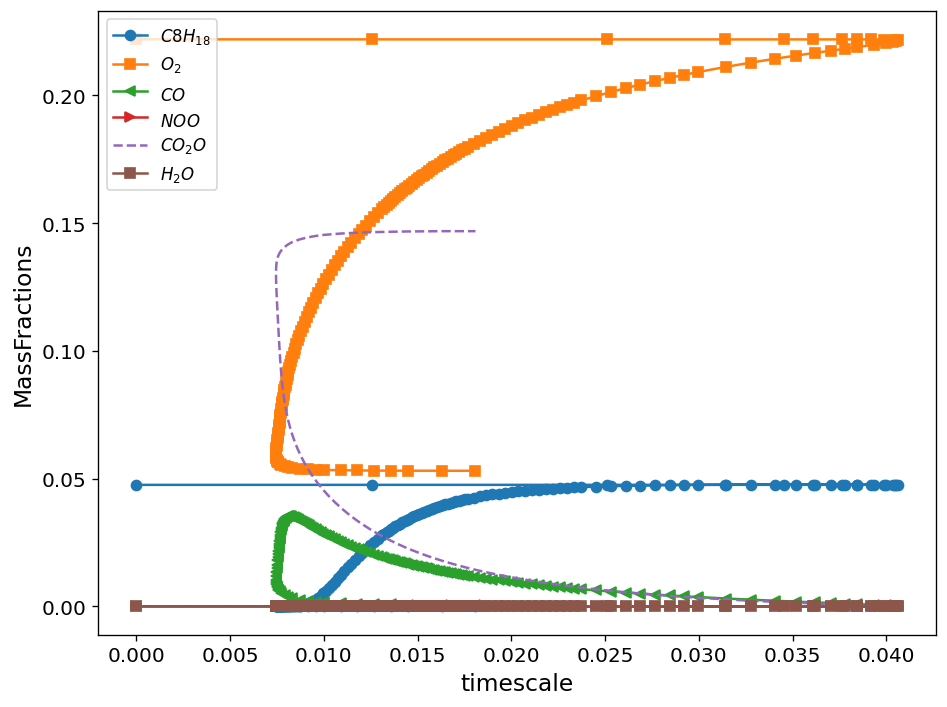

In [87]:
plt.figure()

plt.plot(timescale, Y_C8H18, "-o", label="$C8H_{18}$")
plt.plot(timescale, Y_O2, "-s", label="$O_{2}$")
plt.plot(timescale, Y_CO, "-<", label="$CO_{}$")
plt.plot(timescale, Y_NO, "->", label="$NO_{}O$")
plt.plot(timescale, Y_CO2, "--", label="$CO_{2}O$")
plt.plot(timescale, Y_H2O, "-s", label="$H_{2}O$")

plt.legend(loc=2)
plt.xlabel("timescale")
plt.ylabel("MassFractions");

In [88]:
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["legend.fontsize"] = 10
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["figure.dpi"] = 120

# Get the best of both ggplot and seaborn

#from matplotlib import pyplot as plt
#plt.style.use('ggplot')
#plt.style.use('seaborn')

plt.rcParams["figure.autolayout"] = True

In [89]:
# Inlet Temperature in Kelvin and Inlet Pressure in Pascals
# In this case we are setting the inlet T and P to room temperature conditions
To = 300
Po = 101325

# Define the gas-mixutre and kinetics
# In this case, we are choosing a GRI3.0 gas
gas1 = ct.Solution("Jerzembeck.yaml")

# Create a stoichiometric C8H18/Air premixed mixture
gas1.set_equivalence_ratio(0.60, "IXC8H18", {"O2": 1.0, "N2": 3.76})
gas1.TP = To, Po

In [92]:
width = 0.014

# Create the flame object
flame_1 = ct.FreeFlame(gas1, width=width)

# Define tolerances for the solver
flame_1.set_refine_criteria(ratio=3, slope=0.1, curve=0.1)

# Define logging level
loglevel = 1

In [93]:
flame_1.solve(loglevel=loglevel, auto=True)
Su0_1 = flame_1.velocity[0]
print(f"Flame Speed is: {Su0_1 * 100:.2f} cm/s")



************ Solving on 8 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     8.543e-05       5.03
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.00146      4.075
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.01663       3.29
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps        0.4261     0.2674
Attempt Newton solution of steady-state problem...    success.

Problem solved on [9] point grid(s).
Expanding domain to accommodate flame thickness. New width: 0.028 m
##############################################################################
Refining grid in flame.
    New points inserted after grid points 0 1 2 3 4 5 6 7 
    to resolve AXC5H10 C2H C2H2 C2H3 C2H3CHO C2H3CO C2H4 C2H5 C2H5O2 C2H6 C3H2 C3

In [94]:
import pandas as pd
data =  {'Temp':flame_1.T,'Grid':flame_1.grid,'S_L':flame_1.velocity,'Y_IXC8H18':flame_1.Y[63],'Y_CO':flame_1.Y[12],'Y_O2':flame_1.Y[3],'Y_NO':flame_1.Y[104],'Y_CO2':flame_1.Y[14],'Y_H2O':flame_1.Y[5],
         'HRR': flame_1.heat_release_rate,'C_P': flame_1.cp,'lambda':flame_1.thermal_conductivity,}
df = pd.DataFrame(data)
df.to_csv('Premixed_flames_0.6.csv')

In [96]:
df2= pd.read_csv('Premixed_flames.csv')


In [97]:
df2.head()

,Unnamed: 0,Temp,Grid,S_L,Y_IXC8H18,Y_CO,Y_O2,Y_NO,Y_CO2,Y_H2O,HRR,C_P,lambda,time_scale
0,0,300.000000,0.0000,0.223087,0.047536,4.910000e-13,0.221924,9.210000e-17,2.420000e-14,-2.070000e-15,-1.506795e+02,1040.726818,0.024564,0.000000
1,1,300.000000,0.0028,0.223087,0.047536,1.560000e-11,0.221924,2.500000e-15,1.020000e-12,-1.690000e-18,-1.150550e-02,1040.727520,0.024564,0.012551
2,2,300.000018,0.0056,0.223088,0.047536,7.100000e-10,0.221924,1.900000e-14,4.360000e-11,-2.900000e-23,-4.070000e-07,1040.733931,0.024564,0.025102
3,3,300.000235,0.0070,0.223094,0.047536,9.140000e-09,0.221924,2.180000e-13,7.200000e-10,2.350000e-23,9.620000e-08,1040.756736,0.024566,0.031377
4,4,300.001652,0.0077,0.223105,0.047536,6.240000e-08,0.221923,1.480000e-12,6.260000e-09,2.730000e-22,1.200000e-05,1040.803391,0.024571,0.034513


In [98]:
timescale_1 = df1['time_scale']

In [99]:
Y_C8H18_1 = flame_1.Y[63]
Y_O2_1= flame_1.Y[3]
Y_CO_1= flame_1.Y[12]
Y_NO_1= flame_1.Y[104]
Y_CO2_1 = flame_1.Y[14]
Y_H2O_1 = flame_1.Y[5]

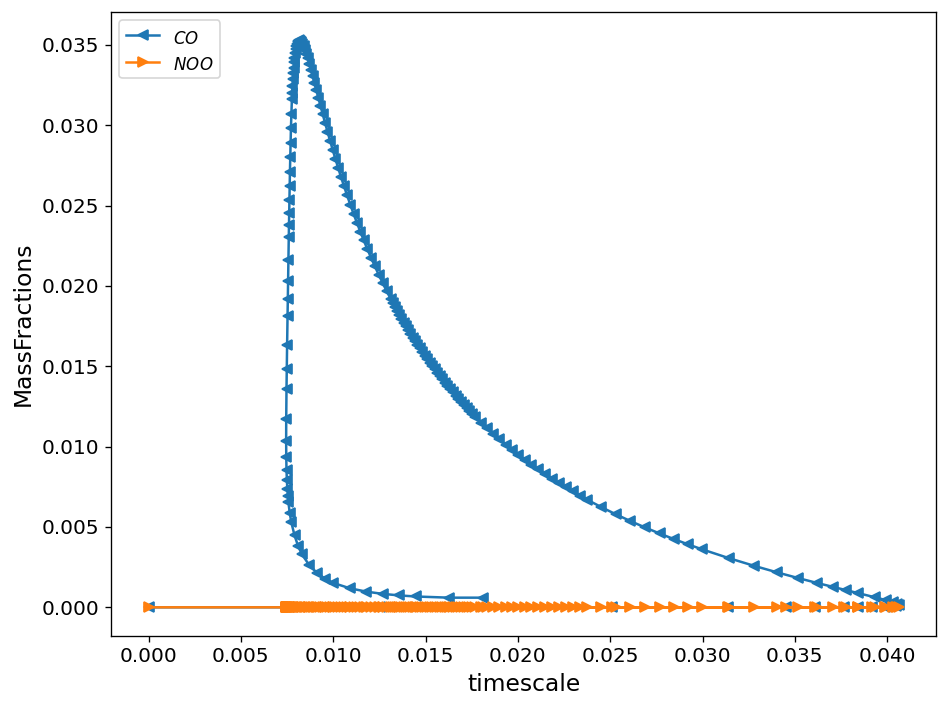

In [100]:
plt.figure()

plt.plot(timescale, Y_CO, "-<", label="$CO_{}$")
plt.plot(timescale, Y_NO, "->", label="$NO_{}O$")

plt.legend(loc=2)
plt.xlabel("timescale")
plt.ylabel("MassFractions");